In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
df = pd.read_csv('iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
# Preprocess the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Visualize the data

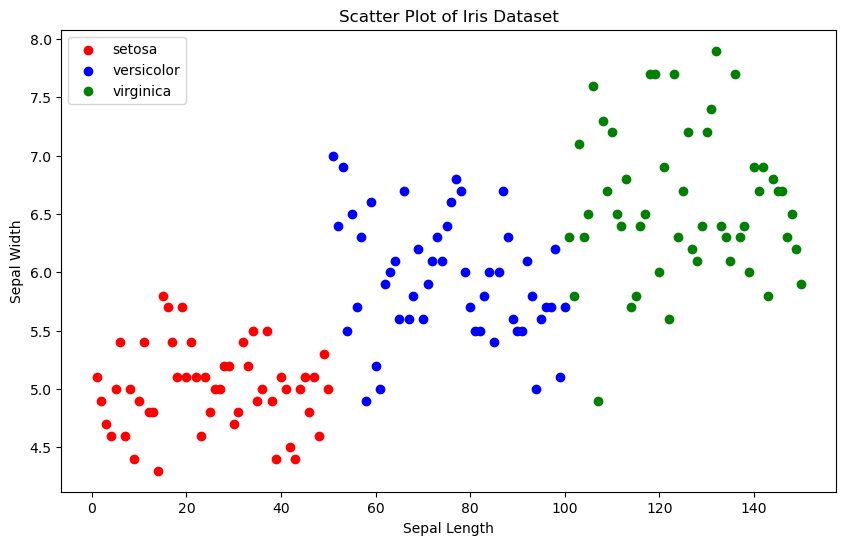

In [6]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green', label='virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Iris Dataset')
plt.legend()
plt.show()

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes Algorithm Implementation

In [8]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_probs = None

    def fit(self, X, y):
        """
        Train the Naive Bayes classifier.

        Parameters:
        - X: Array-like, shape (n_samples, n_features). The training feature vectors.
        - y: Array-like, shape (n_samples,). The target labels.

        """
        self.classes = np.unique(y)
        self.class_priors = {}
        self.feature_probs = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = len(X_c) / len(X)

            self.feature_probs[c] = {}
            for feature_idx in range(X.shape[1]):
                feature_values = np.unique(X[:, feature_idx])
                self.feature_probs[c][feature_idx] = {}

                for value in feature_values:
                    count = np.sum((X_c[:, feature_idx] == value))
                    self.feature_probs[c][feature_idx][value] = count / len(X_c)

    def predict(self, X):
        """
        Make predictions using the trained Naive Bayes classifier.

        Parameters:
        - X: Array-like, shape (n_samples, n_features). The test feature vectors.

        Returns:
        - predictions: Array, shape (n_samples,). The predicted labels.

        """
        predictions = []
        for x in X:
            class_scores = {c: np.log(self.class_priors[c]) for c in self.classes}

            for feature_idx, x_val in enumerate(x):
                for c in self.classes:
                    if x_val in self.feature_probs[c][feature_idx]:
                        class_scores[c] += np.log(self.feature_probs[c][feature_idx][x_val])

            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return np.array(predictions)


## K-Nearest Neighbors (KNN) Algorithm Implementation

In [9]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Train the KNN classifier.

        Parameters:
        - X_train: Array-like, shape (n_samples, n_features). The training feature vectors.
        - y_train: Array-like, shape (n_samples,). The target labels.

        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Make predictions using the trained KNN classifier.

        Parameters:
        - X_test: Array-like, shape (n_samples, n_features). The test feature vectors.

        Returns:
        - predictions: Array, shape (n_samples,). The predicted labels.

        """
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            sorted_indices = np.argsort(distances)
            k_nearest_labels = self.y_train[sorted_indices[:self.k]]
            unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(label_counts)]
            predictions.append(predicted_label)

        return np.array(predictions)

## Initiating classifier by making objects

In [10]:
# Instantiate Naive Bayes classifier
nb = NaiveBayes()
# Train Naive Bayes classifier
nb.fit(X_train, y_train)
# Make predictions using Naive Bayes classifier
nb_predictions = nb.predict(X_test)

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10672\1421030758.py:51: RuntimeWarning: divide by zero encountered in log
  class_scores[c] += np.log(self.feature_probs[c][feature_idx][x_val])


In [11]:
# Instantiate KNN classifier
knn = KNN(k=3)
# Train KNN classifier
knn.fit(X_train, y_train)
# Make predictions using KNN classifier
knn_predictions = knn.predict(X_test)

## Evaluating model performances

In [12]:
# Evaluate accuracy of the models
nb_accuracy = np.sum(nb_predictions == y_test) / len(y_test)
knn_accuracy = np.sum(knn_predictions == y_test) / len(y_test)

## Getting results

In [13]:
# Print accuracy results
print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)

Naive Bayes Accuracy: 0.9333333333333333
KNN Accuracy: 1.0
